In [4]:
import matplotlib.pyplot as plt
import pickle
from scipy import optimize
import networkx as nx
import numpy as np
fontSize = 10
def func1(dims,a,b):  
  return a/dims + b 
#import seaborn as sns

### link prediction and curve fitting

I am  confused with the result that the convergency point of link prediction of walk length 10 and 30 are 12.But the convergency point of nnl are 12 and 22.

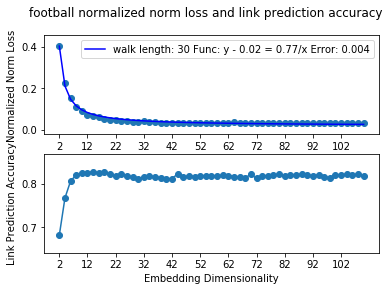

In [6]:
# optimal networks = ['cora','football'],now only football is avaiable.
graph = 'football'
sub_dir = 'link_prediction'
f1 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_walklength_30_nnl.pkl'.format(sub_dir,graph),'rb')
nnl_30 = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_walklength_10_nnl.pkl'.format(sub_dir,graph),'rb')
nnl_10 = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_walklength_30_acc.pkl'.format(sub_dir,graph),'rb')
acc_30 = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_walklength_10_acc.pkl'.format(sub_dir,graph),'rb')
acc_10 = pickle.load(f1)
f1.close()

def prediction_plot(dims,walkLengths,nnl_list,acc_list,graph):   
   fig, (ax1,ax2) = plt.subplots(2,1)   
   colors = ['b','y']
   for cnt,norms in enumerate(nnl_list):
       #accs = accs[:len(dims)]
       c, cov = optimize.curve_fit(func1, dims,norms)
       fit_values = (func1(np.array(dims),c[0],c[1]))
       bias = abs(np.array(norms)-np.array(fit_values))
       label = 'walk length: {} Func: y - {:.2f} = {:.2f}/x Error: {:.3f}'.format(walkLengths[cnt],c[1],c[0],np.mean(bias))  
       ax1.scatter(dims,norms) 
       ax1.plot(dims,func1(np.array(dims),c[0],c[1]),label=label,c=colors[cnt]) 
       ax1.legend()
       accs = acc_list[cnt]
       ax2.scatter(dims,accs)      
       ax2.plot(dims,accs) 
       #ax2.legend()
    
   ax1.set_xticks(range(dims[0],dims[-1],10))
   ax2.set_xticks(range(dims[0],dims[-1],10))  
   ax1.set_ylabel('Normalized Norm Loss')
   ax2.set_xlabel('Embedding Dimensionality',fontsize=fontSize)  
   ax2.set_ylabel('Link Prediction Accuracy')    
   fig.suptitle('{} normalized norm loss and link prediction accuracy'.format(graph))  
   plt.savefig('./meta_data/{}/{}_prediction.eps'.format(sub_dir,graph),format='eps',dpi=3000)
   plt.show()

#prediction_plot(dims,[10,30],[nnl_10,nnl_30],[acc_10,acc_30],graph)
prediction_plot(dims,[30],[nnl_30],[acc_30],graph)

### community detection and curve fitting

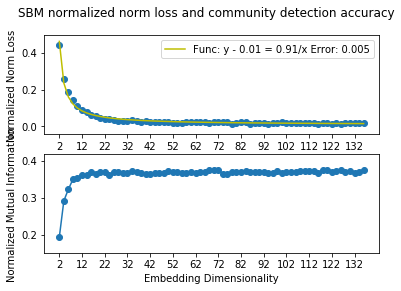

In [24]:
# optimal networks = ['SBM_256_blocks_16']
graph = 'SBM_256_blocks_16'
sub_dir = 'community_detection'
f2 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f2)
f2.close()
f1 = open('./meta_data/{}/{}_nnl.pkl'.format(sub_dir,graph),'rb')
nnl = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_acc.pkl'.format(sub_dir,graph),'rb')
nmis = pickle.load(f1)
f1.close()

def clustering_plot(dims,nnl,nmis,graph):   
   fig, (ax1,ax2) = plt.subplots(2,1) 
   c, cov = optimize.curve_fit(func1, dims,nnl)
   fit_values = (func1(np.array(dims),c[0],c[1]))
   bias = abs(np.array(nnl)-np.array(fit_values))
   label = 'Func: y - {:.2f} = {:.2f}/x Error: {:.3f}'.format(c[1],c[0],np.mean(bias))
   ax1.scatter(dims,nnl) 
   ax1.plot(dims,func1(np.array(dims),c[0],c[1]),label=label,color='y') 
   ax1.legend()
   ax2.scatter(dims,nmis) 
   ax2.plot(dims,nmis) 
    
   ax1.set_xticks(range(dims[0],dims[-1],10))
   ax2.set_xticks(range(dims[0],dims[-1],10))  
   ax1.set_ylabel('Normalized Norm Loss')
   ax2.set_xlabel('Embedding Dimensionality',fontsize=fontSize)  
   ax2.set_ylabel('Normalized Mutual Information')    
   fig.suptitle('SBM normalized norm loss and community detection accuracy'.format(graph))     
   plt.savefig('./meta_data/{}/{}_clustering.eps'.format(sub_dir,graph),format='eps',dpi=3000)
   plt.show()

clustering_plot(dims,nnl,nmis,graph)

### network size and density

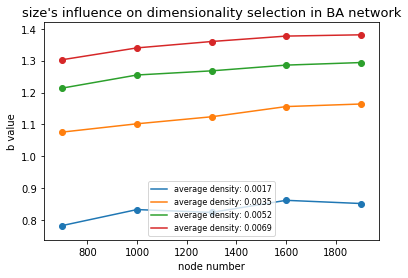

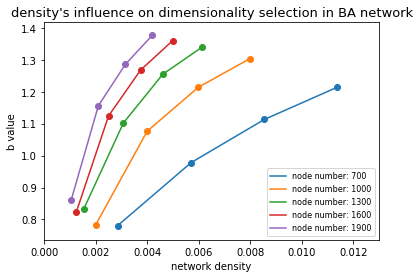

In [14]:
graph = 'BA'
sub_dir = 'size_density'

nodes_list =  range(400,2000,300)[1:]
nodes_density = [i*0.0005 for i in range(5,21,5)]

density_list = []; node_list = []
for density in nodes_density:
    for node in nodes_list:    
      G = nx. read_edgelist('./meta_data/{}/graph/{}_node_{}_density_{}'.format(sub_dir,graph,node,density))
      density_list.append(nx.density(G))
      node_list.append(len(G.nodes()))
density_matrix = np.array(density_list).reshape(len(nodes_density),-1)
node_matrix = np.array(node_list).reshape(len(nodes_density),-1)
b_matrixs =  np.load('./meta_data/{}/{}_para_0_matrixs.npy'.format(sub_dir,graph))

# plot network size's influence
fig, ax1 = plt.subplots()
for index,i in enumerate(nodes_density): 

    ax1.scatter(node_matrix[index,:],b_matrixs[0,index,:][1:])
    ax1.plot(node_matrix[index,:],b_matrixs[0,index,:][1:],label='average density: {:.4f}'.format(np.mean(density_matrix[index,:])))

    ax1.set_xlabel('node number',fontsize = fontSize)
    ax1.set_ylabel('b value',fontsize = fontSize)
    ax1.legend(fontsize=8)  

plt.title('size\'s influence on dimensionality selection in {} network'.format(graph),fontsize =13) 
plt.savefig('./meta_data/{}/{}_nodeNumber.eps'.format(sub_dir,graph),format='eps',dpi=3000)  
plt.show()

# plot network density's influence
fig, ax2 = plt.subplots()
for index,i in enumerate(nodes_list):
    ax2.scatter(density_matrix[:,index],b_matrixs[0,:,index])
    ax2.plot(density_matrix[:,index],b_matrixs[0,:,index],label='node number: {:d}'.format(int(np.mean(node_matrix[:,index]))))
  
    ax2.set_xlabel('network density',fontsize = fontSize)
    ax2.set_ylabel('b value',fontsize = fontSize)
    ax2.legend(fontsize=8)

plt.xlim(0.000,0.013)
plt.title('density\'s influence on dimensionality selection in {} network'.format(graph),fontsize =13) 
plt.savefig('./meta_data/{}/{}_density.eps'.format(sub_dir,graph),format='eps',dpi=3000)  
plt.show()

### variance

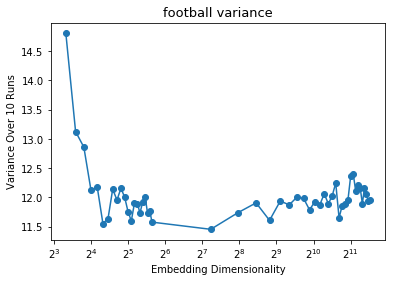

In [19]:
# optimal networks = ['cora','football']
graph = 'football'
sub_dir = 'variance'
f1 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_variance.pkl'.format(sub_dir,graph),'rb')
variance = pickle.load(f1)
f1.close()

def variance_plot(dims,variance,graph):   
   fig, ax1 = plt.subplots() 
   ax1.scatter(dims,variance) 
   ax1.plot(dims,variance) 
   #ax1.legend()     
   ax1.set_xscale('log', basex=2)         
      
   ax1.set_ylabel('Variance Over 10 Runs',fontsize = fontSize)
   ax1.set_xlabel('Embedding Dimensionality',fontsize = fontSize)      
   plt.title('{} variance'.format(graph),fontsize = 13)  
   plt.savefig('./meta_data/{}/{}_variance .eps'.format(sub_dir,graph),format='eps',dpi=5000)  
   plt.show()
variance_plot(dims,variance,graph)

### LINE and node2vec

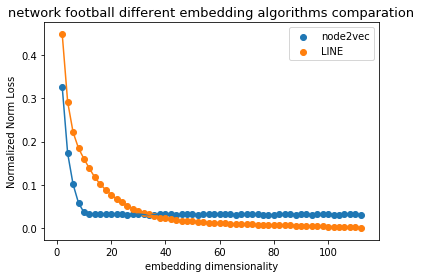

In [6]:
# optimal networks = ['citeseer','football']
graph = 'football'
sub_dir = 'line'
f1 = open('./meta_data/{}/{}_dim_compare'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_line_compare'.format(sub_dir,graph),'rb')
line_norms = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_node2vec_compare'.format(sub_dir,graph),'rb')
node2vec_norms = pickle.load(f1)
f1.close()
#dims = dims[:-1]

def compare_method_plot(dims,node2vec_norm,line_norm,node):   
   fig, ax = plt.subplots() 
   ax.scatter(dims,node2vec_norms,label='node2vec') 
   ax.plot(dims,node2vec_norms) 
   ax.scatter(dims,line_norms,label='LINE')
   ax.plot(dims,line_norms)
   ax.legend()           
   ax.set_ylabel('Normalized Norm Loss',fontsize = 10)
   ax.set_xlabel('embedding dimensionality',fontsize = 10)             
   plt.title('network {} different embedding algorithms comparation'.format(node),fontsize = 13)   
   plt.savefig('./meta_data/{}/compare different embedding methods:{}.eps'.format(sub_dir,node),format='eps',dpi=4000)
   plt.show()

compare_method_plot(dims,node2vec_norms,line_norms,graph)    

### PPI loss